In [1]:
%matplotlib inline
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
df = pd.read_csv("GamesHabrJson.csv").drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,title,description,date,tags,rating
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10


__title__ - название статьи/игры/файла

__description__ - описание статьи/игры/файла

__date_publish__ - дата выхода/публикации

__tags__ - тэги статьи/игры/файла

__rating__ - рейтинг статьи/игры/файла

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1320 non-null   object
 1   description  1320 non-null   object
 2   date         1320 non-null   object
 3   tags         1319 non-null   object
 4   rating       1320 non-null   object
dtypes: object(5)
memory usage: 51.7+ KB


## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [5]:
import re

def remove_english_words(text):
    # Удаляет слова, состоящие только из английских букв (включая сокращения)
    return re.sub(r'\b[a-zA-Z]+\b', '', text)

def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [6]:
df['prep_text'] = [remove_english_words(remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower()))))) for text in df['description']]

In [7]:
df.head()

,title,description,date,tags,rating,prep_text
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10,более двух десятилетий служит примером перво...
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10,раз в год художница просыпается и рисует на мо...
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10,последняя линия нападения галактики станьте ад...
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10,приключенческая ролевая игра с открытым миром...
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10,самая популярная игра в steamежедневно миллион...


In [8]:
df['description'][0]

'Более двух десятилетий Counter-Strike служит примером первоклассной соревновательной игры, путь развития которой определяют миллионы игроков со всего мира. Теперь пришло время нового этапа — Counter-Strike 2.Counter-Strike 2 — это бесплатное улучшение для CS:GO, которое знаменует собой крупнейший технологический скачок в истории серии. Оно разработано на движке Source 2 и модернизирует игру благодаря реалистичному и физически корректному рендерингу, организации сети по последнему слову технологий и улучшенным инструментам для мастерской сообщества.Кроме представленного в 1999 году классического игрового процесса, завязанного на достижении цели, Counter-Strike 2 включает:новые рейтинги CS и обновлённый премьер-режим;глобальные и региональные таблицы лидеров;улучшенные и воссозданные с нуля карты;принципиально новый динамический дым от гранат;игровой процесс, не зависящий от тикрейта;переосмысленные визуальные эффекты и звуки;все предметы инвентаря из CS:GO.'

In [9]:
df['prep_text'][0]

'более двух десятилетий   служит примером первоклассной соревновательной игры путь развития которой определяют миллионы игроков со всего мира теперь пришло время нового этапа     это бесплатное улучшение для   которое знаменует собой крупнейший технологический скачок в истории серии оно разработано на движке  и модернизирует игру благодаря реалистичному и физически корректному рендерингу организации сети по последнему слову технологий и улучшенным инструментам для мастерской сообщества кроме представленного в году классического игрового процесса завязанного на достижении цели   включает новые рейтинги  и обновлённый премьер режим глобальные и региональные таблицы лидеров улучшенные и воссозданные с нуля карты принципиально новый динамический дым от гранат игровой процесс не зависящий от тикрейта переосмысленные визуальные эффекты и звуки все предметы инвентаря из   '

In [10]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем','наш', 'свой']) 
russian_stopwords 

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [11]:
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [12]:
df['tokenize_text'] = [tokenize(text) for text in df['prep_text']]

In [13]:
df.head()

,title,description,date,tags,rating,prep_text,tokenize_text
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10,более двух десятилетий служит примером перво...,двух десятилетий служит примером первоклассной...
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10,раз в год художница просыпается и рисует на мо...,год художница просыпается рисует монолите выво...
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10,последняя линия нападения галактики станьте ад...,последняя линия нападения галактики станьте ад...
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10,приключенческая ролевая игра с открытым миром...,приключенческая ролевая игра открытым миром ра...
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10,самая популярная игра в steamежедневно миллион...,самая популярная игра steamежедневно миллионы ...


In [14]:
df['tokenize_text'][0]

'двух десятилетий служит примером первоклассной соревновательной игры путь развития которой определяют миллионы игроков мира пришло время нового этапа бесплатное улучшение которое знаменует собой крупнейший технологический скачок истории серии оно разработано движке модернизирует игру благодаря реалистичному физически корректному рендерингу организации сети последнему слову технологий улучшенным инструментам мастерской сообщества кроме представленного году классического игрового процесса завязанного достижении цели включает новые рейтинги обновлённый премьер режим глобальные региональные таблицы лидеров улучшенные воссозданные нуля карты принципиально новый динамический дым гранат игровой процесс зависящий тикрейта переосмысленные визуальные эффекты звуки предметы инвентаря'

In [15]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [16]:
df.head()

,title,description,date,tags,rating,prep_text,tokenize_text,text_stem
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10,более двух десятилетий служит примером перво...,двух десятилетий служит примером первоклассной...,двух десятилет служ пример первоклассн соревно...
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10,раз в год художница просыпается и рисует на мо...,год художница просыпается рисует монолите выво...,год художниц просыпа рис монол вывод сво прокл...
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10,последняя линия нападения галактики станьте ад...,последняя линия нападения галактики станьте ад...,последн лин нападен галактик станьт адск десан...
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10,приключенческая ролевая игра с открытым миром...,приключенческая ролевая игра открытым миром ра...,приключенческ ролев игр открыт мир рассказыва ...
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10,самая популярная игра в steamежедневно миллион...,самая популярная игра steamежедневно миллионы ...,сам популярн игр стеамежедневн миллион игрок в...


In [17]:
df['text_stem'][0]

'двух десятилет служ пример первоклассн соревновательн игр пут развит котор определя миллион игрок мир пришл врем нов этап бесплатн улучшен котор знамен соб крупн технологическ скачок истор сер он разработа движк модернизир игр благодар реалистичн физическ корректн рендеринг организац сет последн слов технолог улучшен инструмент мастерск сообществ кром представлен год классическ игров процесс завяза достижен цел включа нов рейтинг обновлен премьер реж глобальн региональн таблиц лидер улучшен воссозда нул карт принципиальн нов динамическ дым гранат игров процесс завися тикрейт переосмыслен визуальн эффект звук предмет инвентар'

In [18]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [19]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 1min 34s
Wall time: 1min 35s


In [20]:
df.head()

,title,description,date,tags,rating,prep_text,tokenize_text,text_stem,text_lemm
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10,более двух десятилетий служит примером перво...,двух десятилетий служит примером первоклассной...,двух десятилет служ пример первоклассн соревно...,два десятилетие служить пример первоклассный с...
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10,раз в год художница просыпается и рисует на мо...,год художница просыпается рисует монолите выво...,год художниц просыпа рис монол вывод сво прокл...,год художница просыпаться рисовать монолит выв...
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10,последняя линия нападения галактики станьте ад...,последняя линия нападения галактики станьте ад...,последн лин нападен галактик станьт адск десан...,последний линия нападение галактика стать адск...
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10,приключенческая ролевая игра с открытым миром...,приключенческая ролевая игра открытым миром ра...,приключенческ ролев игр открыт мир рассказыва ...,приключенческий ролевый игра открытый мир расс...
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10,самая популярная игра в steamежедневно миллион...,самая популярная игра steamежедневно миллионы ...,сам популярн игр стеамежедневн миллион игрок в...,самый популярный игра steamежедневно миллион и...


In [21]:
df['text_lemm'][0]

'два десятилетие служить пример первоклассный соревновательный игра путь развитие который определять миллион игрок мир прийти время новый этап бесплатный улучшение который знаменовать себя крупный технологический скачок история серия оно разработать движок модернизировать игра благодаря реалистичный физически корректный рендеринг организация сеть последний слово технология улучшить инструмент мастерская сообщество кроме представить год классический игровой процесс завязать достижение цель включать новый рейтинг обновить премьер режим глобальный региональный таблица лидер улучшить воссоздать нуль карта принципиально новый динамический дым гранат игровой процесс зависеть тикрейт переосмыслить визуальный эффект звук предмет инвентарь'

In [22]:
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [23]:
df.head()

,title,description,date,tags,rating,prep_text,tokenize_text,text_stem,text_lemm
0,Counter-Strike 2,Более двух десятилетий Counter-Strike служит п...,"21 Aug, 2012","Шутер от первого лица, Шутер, Для нескольких и...",9 / 10,более двух десятилетий служит примером перво...,двух десятилетий служит примером первоклассной...,двух десятилет служ пример первоклассн соревно...,десятилетие служить пример первоклассный сорев...
1,Clair Obscur: Expedition 33,Раз в год Художница просыпается и рисует на Мо...,"24 Apr, 2025","Пошаговые сражения, Глубокий сюжет, Фэнтези, И...",10 / 10,раз в год художница просыпается и рисует на мо...,год художница просыпается рисует монолите выво...,год художниц просыпа рис монол вывод сво прокл...,год художница просыпаться рисовать монолит выв...
2,HELLDIVERS™ 2,Последняя линия нападения галактики.Станьте Ад...,"8 Feb, 2024","Сетевой кооператив, Игрок против ИИ, Шутер от ...",7 / 10,последняя линия нападения галактики станьте ад...,последняя линия нападения галактики станьте ад...,последн лин нападен галактик станьт адск десан...,последний линия нападение галактика стать адск...
3,Cyberpunk 2077,Cyberpunk 2077 — приключенческая ролевая игра ...,"9 Dec, 2020","Киберпанк, Открытый мир, Нагота, Ролевая игра,...",9 / 10,приключенческая ролевая игра с открытым миром...,приключенческая ролевая игра открытым миром ра...,приключенческ ролев игр открыт мир рассказыва ...,приключенческий ролевый игра открытый мир расс...
4,Dota 2,Самая популярная игра в SteamЕжедневно миллион...,"9 Jul, 2013","Бесплатная игра, MOBA, Для нескольких игроков,...",9 / 10,самая популярная игра в steamежедневно миллион...,самая популярная игра steamежедневно миллионы ...,сам популярн игр стеамежедневн миллион игрок в...,самый популярный игра steamежедневно миллион и...


In [24]:
df.to_csv("games_lemm.csv", index=False)

# Облако слов

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

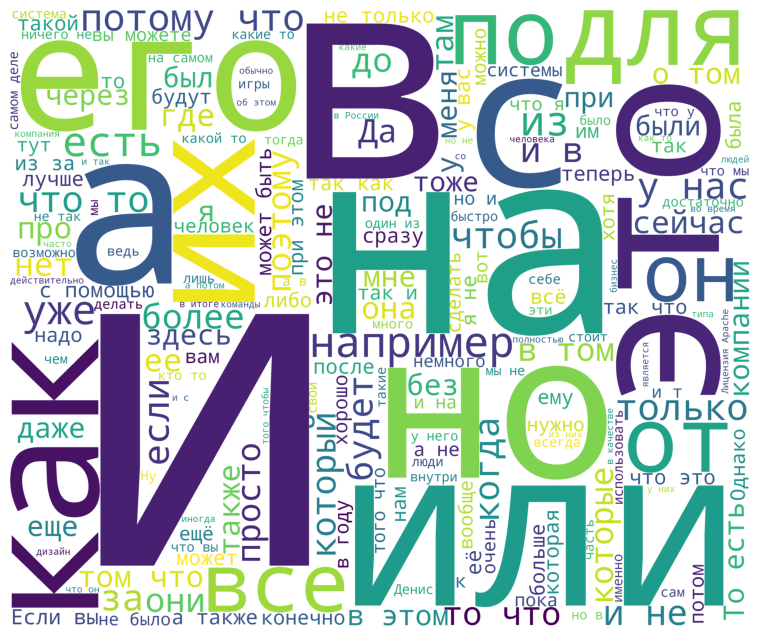

In [27]:
corpus = get_corpus(df['description'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()
plt.close(fig)

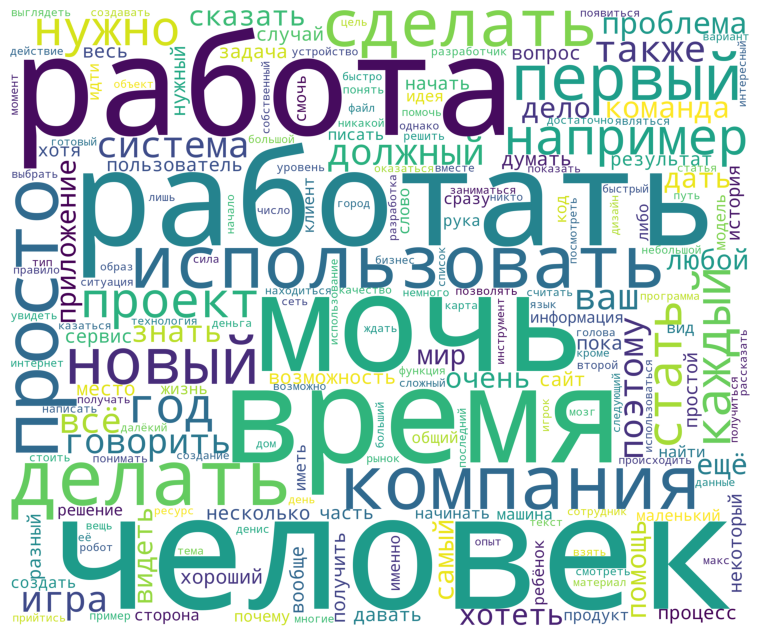

In [28]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()
plt.close(fig)

In [29]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

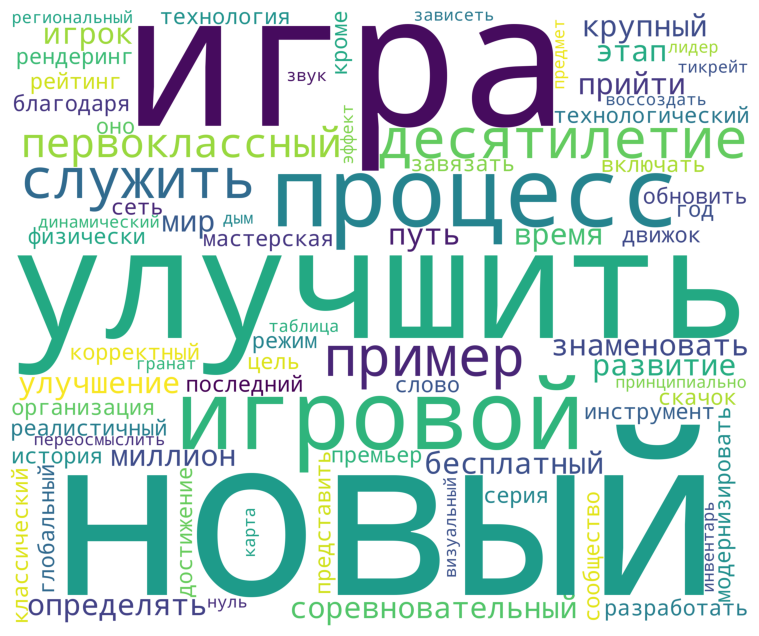

In [30]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()
plt.close(fig)

In [31]:
df['text_lemm'][0]

'десятилетие служить пример первоклассный соревновательный игра путь развитие определять миллион игрок мир прийти время новый этап бесплатный улучшение знаменовать крупный технологический скачок история серия оно разработать движок модернизировать игра благодаря реалистичный физически корректный рендеринг организация сеть последний слово технология улучшить инструмент мастерская сообщество кроме представить год классический игровой процесс завязать достижение цель включать новый рейтинг обновить премьер режим глобальный региональный таблица лидер улучшить воссоздать нуль карта принципиально новый динамический дым гранат игровой процесс зависеть тикрейт переосмыслить визуальный эффект звук предмет инвентарь'

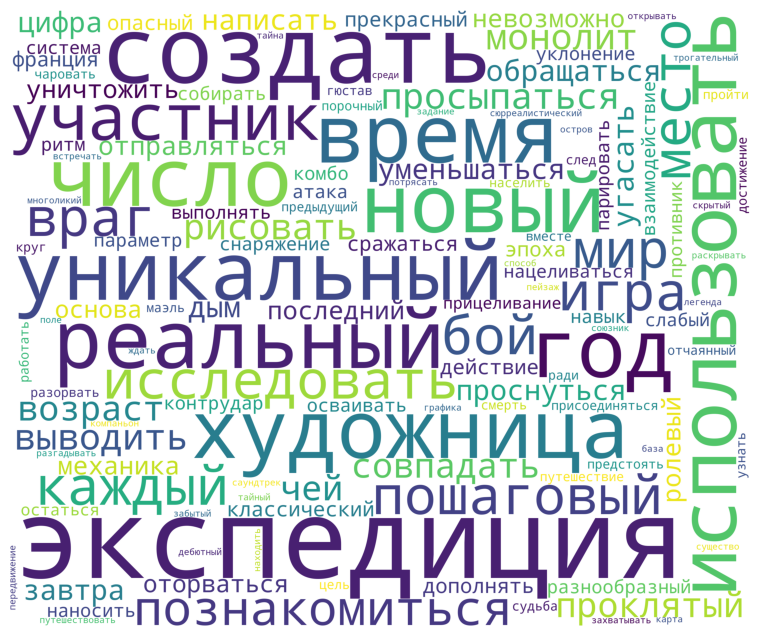

In [32]:
corpus = df['text_lemm'][1]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()
plt.close(fig)

In [33]:
df['text_lemm'][1]

'год художница просыпаться рисовать монолит выводить проклятый число каждый чей возраст совпадать число обращаться дым угасать каждый год число уменьшаться завтра проснуться написать цифра отправляться последний экспедиция уничтожить художница экспедиция новый пошаговый ролевый игра уникальный механика реальный время невозможно оторваться исследовать мир создать основа прекрасный эпоха франция сражаться опасный враг новый действие реальный время дополнять классический пошаговый бой создать уникальный экспедиция использовать разнообразный снаряжение навык параметр взаимодействие участник выполнять уклонение парировать наносить контрудар реальный время собирать комбо осваивать ритм атака нацеливаться слабый место противник использовать система прицеливание остаться год присоединяться гюстав маэль участник экспедиция отчаянный путешествие разорвать порочный круг смерть создать художница пройти след предыдущий экспедиция узнать судьба познакомиться участник экспедиция предстоять работать в

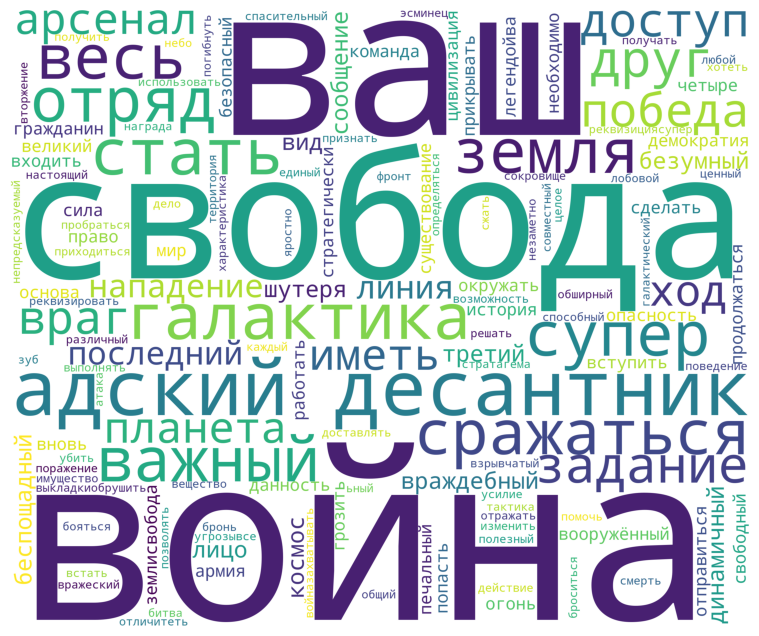

In [34]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.imshow(procWordCloud)
plt.axis('off')
plt.show()
plt.close(fig)

In [35]:
df['text_lemm'][2]

'последний линия нападение галактика стать адский десантник сражаться свобода весь враждебный космос динамичный безумный беспощадный шутеря вид третий лицо важный сообщение вооружённый сила супер землисвобода мир демократия ваш право гражданин супер земля основа цивилизация существование война продолжаться вновь весь окружать грозить опасность вступить великий армия история сделать галактика безопасный свободный стать легендойва попасть отряд входить четыре адский десантник отправиться стратегически важный задание прикрывать друг друг огонь печальный данность война победа необходимо работать команда выкладкиобрушить свобода небо незаметно пробраться территория враг сжать зуб броситься лобовой атака решать доставлять свобода получить доступ обширный арсенал взрывчатый вещество спасительный бронь способный изменить ход битва стратагема настоящий сокровище арсенал адский десантник реквизициясупер земля признать ваш усилие позволять реквизировать ценный имущество использовать возможность п

# Векторизация текстовых данных

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
df['text_lemm'][0]

'десятилетие служить пример первоклассный соревновательный игра путь развитие определять миллион игрок мир прийти время новый этап бесплатный улучшение знаменовать крупный технологический скачок история серия оно разработать движок модернизировать игра благодаря реалистичный физически корректный рендеринг организация сеть последний слово технология улучшить инструмент мастерская сообщество кроме представить год классический игровой процесс завязать достижение цель включать новый рейтинг обновить премьер режим глобальный региональный таблица лидер улучшить воссоздать нуль карта принципиально новый динамический дым гранат игровой процесс зависеть тикрейт переосмыслить визуальный эффект звук предмет инвентарь'

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [39]:
print(vectorizer.vocabulary_)

{'десятилетие': 10375, 'служить': 42624, 'пример': 35473, 'первоклассный': 30346, 'соревновательный': 43392, 'игра': 14641, 'путь': 37384, 'развитие': 37834, 'определять': 28204, 'миллион': 22182, 'игрок': 14678, 'мир': 22317, 'прийти': 35331, 'время': 6815, 'новый': 26430, 'этап': 52820, 'бесплатный': 3279, 'улучшение': 47906, 'знаменовать': 14439, 'крупный': 19198, 'технологический': 46094, 'скачок': 42110, 'история': 15983, 'серия': 41613, 'оно': 28030, 'разработать': 38196, 'движок': 9832, 'модернизировать': 22675, 'благодаря': 3634, 'реалистичный': 38985, 'физически': 49047, 'корректный': 18584, 'рендеринг': 39422, 'организация': 28345, 'сеть': 41679, 'последний': 33955, 'слово': 42562, 'технология': 46097, 'улучшить': 47911, 'инструмент': 15476, 'мастерская': 21266, 'сообщество': 43303, 'кроме': 19121, 'представить': 34815, 'год': 8833, 'классический': 17255, 'игровой': 14672, 'процесс': 37011, 'завязать': 12721, 'достижение': 11513, 'цель': 50584, 'включать': 5883, 'рейтинг': 39

In [40]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [41]:
count_matrix.shape

(1320, 203494)

In [42]:
vectorizer.get_feature_names_out()[45000:46000]

array(['зажать клавиша', 'зажать клавиша глаз', 'зажать рот',
       'зажать рот полный', 'заждаться', 'заждаться вход',
       'заждаться вход здание', 'зажечь', 'зажечься', 'зажечься мощный',
       'зажечься мощный лампа', 'зажечься пронзительно',
       'зажечься пронзительно синий', 'зажечься ровный',
       'зажечься ровный яркий', 'заживать', 'заживо', 'зажигалка',
       'зажигалка попробовать', 'зажигалка попробовать детство',
       'зажигалка хреновый', 'зажигалка хреновый метод', 'зажигание',
       'зажигательный', 'зажигательный минь',
       'зажигательный минь презентация', 'зажигательный танец',
       'зажигательный танец стол', 'зажигать', 'зажигаться', 'зажим',
       'зажимать', 'зажимать рот', 'зажимать рот секунда', 'зажиточный',
       'зажить', 'зажмуриться', 'зазвенеть', 'зазвонить',
       'зазвонить беззвучный', 'зазвонить беззвучный режим', 'зазвучать',
       'заземление', 'заземлить', 'зазор', 'зазорно', 'зазрение',
       'зазрение совесть', 'зазубрить',

In [43]:
vectorizer.get_feature_names_out()[3087]

'аукцион'

In [44]:
vectorizer.get_feature_names_out()[25765]

'глубоко проработать'

In [45]:
print(count_matrix)

  (0, 34601)	1
  (0, 164215)	1
  (0, 132713)	1
  (0, 110467)	1
  (0, 169117)	1
  (0, 51060)	2
  (0, 141815)	1
  (0, 144966)	1
  (0, 102183)	1
  (0, 78772)	1
  (0, 51757)	1
  (0, 79278)	1
  (0, 131710)	1
  (0, 18801)	1
  (0, 94176)	3
  (0, 202224)	1
  (0, 4639)	1
  (0, 186713)	1
  (0, 68955)	1
  (0, 181247)	1
  (0, 161828)	1
  (0, 58297)	1
  (0, 159125)	1
  (0, 101500)	1
  (0, 146568)	1
  :	:
  (1319, 176497)	1
  (1319, 24388)	2
  (1319, 184334)	3
  (1319, 29237)	1
  (1319, 136137)	1
  (1319, 110045)	1
  (1319, 26987)	1
  (1319, 38054)	2
  (1319, 38069)	1
  (1319, 38071)	1
  (1319, 54406)	1
  (1319, 189535)	1
  (1319, 112730)	1
  (1319, 101135)	1
  (1319, 120816)	1
  (1319, 26988)	1
  (1319, 191925)	1
  (1319, 137003)	1
  (1319, 28587)	1
  (1319, 167816)	1
  (1319, 191895)	1
  (1319, 29122)	3
  (1319, 38066)	1
  (1319, 38067)	1
  (1319, 168850)	1


3. TF-IDF

__TF-IDF__ - это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления. В тексте большого объема некоторые слова могут присутствовать очень часто, но при этом не нести никакой значимой информации о фактическом содержании текста (документа). Если такие данные передавать непосредственно классификатору, то такие частые термины могут затенять частоты более редких, но при этом более интересных терминов. Для того, чтобы этого избежать, достаточно разделить количество употреблений каждого слова в документе на общее количество слов в документе, это есть TF — частота термина. Термин IDF (inverse document frequency) обозначает обратную частоту термина (инверсия частоты) с которой некоторое слово встречается в документах. IDF позволяет измерить непосредственную важность термина.


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [48]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 9.67 s
Wall time: 9.88 s


In [49]:
tfidf_matrix.shape

(1320, 8586)

In [50]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['абзац', 'абсолютно', 'абсолютный', 'абстрактный', 'абстракция',
       'аварийный', 'авария', 'аватар', 'август', 'август год',
       'авиакомпания', 'авиация', 'авить', 'австралия', 'авто', 'автобус',
       'автомат', 'автоматизация', 'автоматизированный',
       'автоматизировать', 'автоматически', 'автоматический',
       'автомобиль', 'автомобильный', 'автономный', 'автопилот', 'автор',
       'авторизация', 'авторитет', 'авторитетный', 'авторский', 'ага',
       'агент', 'агентство', 'агрегатор', 'агрегатор такси',
       'агрессивный', 'агрессия', 'ад', 'адаптация', 'адаптер',
       'адаптивный', 'адаптировать', 'адаптироваться', 'адекватно',
       'адекватный', 'адепт', 'админ', 'административный',
       'администратор', 'администрация', 'администрирование', 'админк',
       'адрес', 'адский', 'аж', 'азия', 'айтишник', 'айфон',
       'академический', 'академия', 'аккаунт', 'аккумулятор', 'аккуратно',
       'аккуратный', 'аксессуар', 'акт', 'актив', 'активация',
  

In [51]:
tfidf_vectorizer.get_feature_names_out()[1253]

'гордость'

In [52]:
tfidf_vectorizer.get_feature_names_out()[5866]

'проксить'

In [53]:
print(tfidf_matrix)

  (0, 1455)	0.13729181994216702
  (0, 6887)	0.11890593629814221
  (0, 5658)	0.07053688015590509
  (0, 2175)	0.11236191697597687
  (0, 6038)	0.06817285225945516
  (0, 6146)	0.0732696386598188
  (0, 4219)	0.10183954635369069
  (0, 3224)	0.09143803447437067
  (0, 2195)	0.07491723228109737
  (0, 3248)	0.05087948452092077
  (0, 5624)	0.07797266875615455
  (0, 840)	0.04614970803413019
  (0, 3858)	0.12471975234697993
  (0, 8528)	0.08462690549479229
  (0, 242)	0.08989317849471692
  (0, 7863)	0.09603002417085355
  (0, 2902)	0.07881147984094261
  (0, 7571)	0.10708907073292116
  (0, 6798)	0.1714108541105659
  (0, 2455)	0.06267960146544765
  (0, 6717)	0.09530626084905146
  (0, 4185)	0.08000237553689116
  (0, 6216)	0.09289593597832321
  (0, 1380)	0.12005745471419409
  (0, 3304)	0.16949128054237436
  :	:
  (1319, 7069)	0.10428825559287838
  (1319, 5796)	0.11879801557442203
  (1319, 4158)	0.0751595881742862
  (1319, 8188)	0.1359223828550756
  (1319, 1926)	0.12365344309831916
  (1319, 8104)	0.19023700